### Problem 1
Load Breast Cancer dataset (`sklearn.datasets.load_breast_cancer`), implement PCA from scratch on it and plot the corresponding projection color-coded. Do the same with three arbitrary digits subset from *digits* dataset.

Try projecting *digits* dataset with t-SNE (`sklearn.manifold.TSNE`), compare the results.

In [1]:
import numpy as np
import scipy.linalg as la
import sklearn.datasets as ds
import matplotlib.pyplot as plt
#matplotlib inline

In [6]:
D = ds.load_breast_cancer()
X = D['data']
labels = D['target']

In [8]:
mu = X.mean(axis=0)
X_0 = X - mu
A = X.T @ X

In [13]:
w, ev = la.eig(A)
print(w)

[9.47805173e+08+0.j 6.15261128e+06+0.j 7.75214997e+05+0.j
 3.08161865e+05+0.j 2.34525303e+04+0.j 3.28217652e+03+0.j
 1.04033653e+03+0.j 2.11680737e+02+0.j 9.66828410e+01+0.j
 4.99857648e+01+0.j 1.95840388e+01+0.j 4.86495390e+00+0.j
 1.98576241e+00+0.j 1.36712551e+00+0.j 7.53587605e-01+0.j
 3.82712944e-01+0.j 2.25398780e-01+0.j 2.12921328e-01+0.j
 1.07597951e-01+0.j 9.45577166e-02+0.j 4.44067172e-02+0.j
 4.06949123e-02+0.j 1.98503980e-02+0.j 1.61613716e-02+0.j
 9.72208699e-03+0.j 7.09962582e-03+0.j 3.18901541e-03+0.j
 1.97695370e-03+0.j 4.29590106e-04+0.j 1.13882763e-03+0.j]


In [17]:
P = ev[:, :2]

In [18]:
Y = X@P

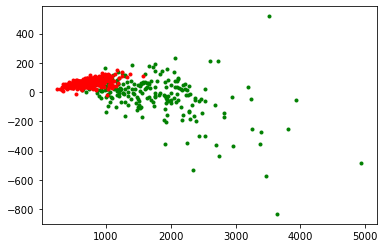

In [24]:
plt.plot(Y[labels==0,0], Y[labels==0,1], 'g.', Y[labels==1,0], Y[labels==1,1], 'r.')
plt.show()

In [26]:
def PCA_2D(X):
    mu = X.mean(axis=0)
    X_0 = X - mu
    A = X.T @ X
    w, ev = la.eig(A)
    P = ev[:, :2]
    Y = X@P
    return Y

In [52]:
D = ds.load_digits()
X = D['data']
labels = D['target']
d = [0,1,5]

In [53]:
X = X[np.any([labels==d[0], labels==d[1], labels==d[2]], axis=0),:]
labels = labels[np.any([labels==d[0], labels==d[1], labels==d[2]], axis=0)]
Y = PCA_2D(X)

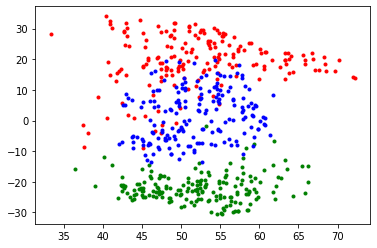

In [54]:
plt.plot(Y[labels==d[0],0], Y[labels==d[0],1], 'g.', Y[labels==d[1],0], Y[labels==d[1],1], 'r.',Y[labels==d[2],0], Y[labels==d[2],1], 'b.')
plt.show()

In [48]:
from sklearn.manifold import TSNE

In [55]:
Y = TSNE(n_components=2).fit_transform(X)

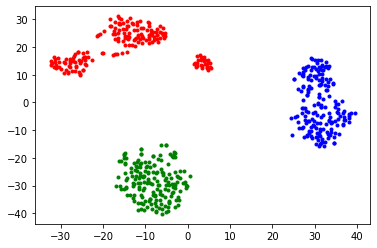

In [56]:
plt.plot(Y[labels==d[0],0], Y[labels==d[0],1], 'g.', Y[labels==d[1],0], Y[labels==d[1],1], 'r.',Y[labels==d[2],0], Y[labels==d[2],1], 'b.')
plt.show()

### Problem 2
Load Breast Cancer dataset (sklearn.datasets.load_breast_cancer), use implemented PCA (or sklearn PCA `sklearn.decomposition.PCA`) to project the data onto 1D space using some training subset. Build ROC curve, pick appropriate threshold. Calculate classification metrics on test subset.

In [58]:
import numpy as np
import scipy.linalg as la
import sklearn.datasets as ds
import matplotlib.pyplot as plt
#matplotlib inline
from sklearn.decomposition import PCA

In [59]:
D = ds.load_breast_cancer()
X = D['data']
labels = D['target']

In [61]:
Y = PCA(n_components=1).fit_transform(X)

In [77]:
tpr = []
fpr = []
st = Y.min()
en = Y.max()
step = 1
for th in list(np.arange(st-step/2, en+step/2, step)):
    tp = np.sum(Y[labels == 1]>th)
    fp = np.sum(Y[labels == 0]>th)
    tpr.append(tp/np.sum(labels==1))
    fpr.append(fp/np.sum(labels==0))
tpr = np.array(tpr)
fpr = np.array(fpr)

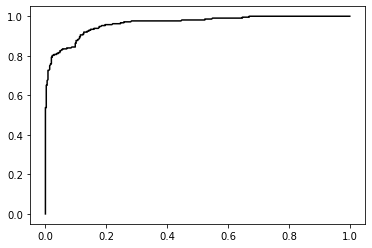

In [79]:
plt.plot(tpr, fpr, 'k-')
plt.show()

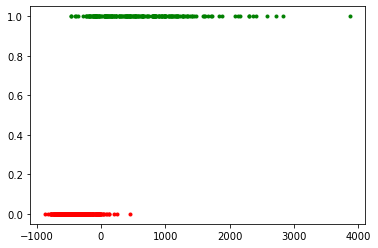

In [74]:
plt.plot(Y[labels==0], np.ones(Y[labels==0].shape), 'g.', Y[labels==1], np.zeros(Y[labels==1].shape), 'r.')
plt.show()

In [71]:
fpr

array([1.        , 0.99824253, 0.99824253, ..., 0.00175747, 0.00175747,
       0.        ])

### Problem 3
Generate 3 scaled sinusoidal signals of sufficiently large length. Find 5 linear mixtures of these signals using some arbitrary numbers for scale. Perform ICA (sklearn.decomposition.FastICA) on the resulting signal, visually check how close reconstructed components are to the original signals.